## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys

## Import Data

In [ ]:
path = "../data/raw/creditcard/creditcard.csv"
credit_card = pd.read_csv(path)

In [3]:
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## EDA

### Data Cleaning

In [6]:
# 1. Handle Missing Values
missing_values = credit_card.isnull().sum()
print("Missing values per column:\n", missing_values[missing_values > 0])

Missing values per column:
 Series([], dtype: int64)


In [7]:
# 2. Remove Duplicates
duplicate_count = credit_card.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 1081


In [8]:
# Drop Duplicates
# Justification: Duplicate transactions in fraud detection can lead to overfitting 
# or misleading frequency patterns.
credit_card.drop_duplicates(inplace=True)

### Univariate Analysis

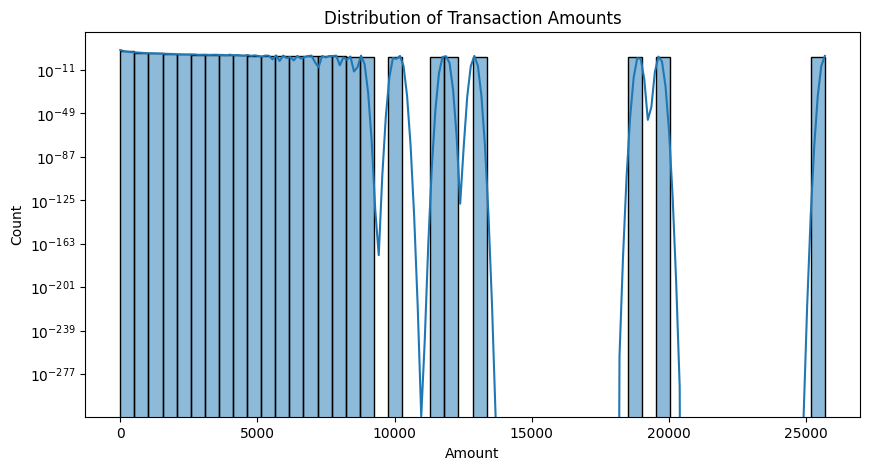

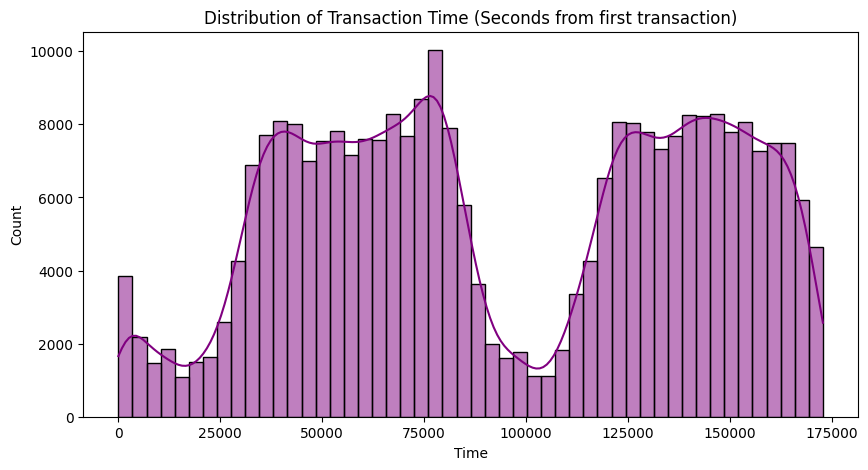

In [9]:
# Distribution of Transaction Amount
plt.figure(figsize=(10, 5))
sns.histplot(credit_card['Amount'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.yscale('log') # Use log scale because amounts are highly skewed
plt.show()

# Distribution of Time
plt.figure(figsize=(10, 5))
sns.histplot(credit_card['Time'], bins=50, kde=True, color='purple')
plt.title('Distribution of Transaction Time (Seconds from first transaction)')
plt.show()

### Bivariate Analysis

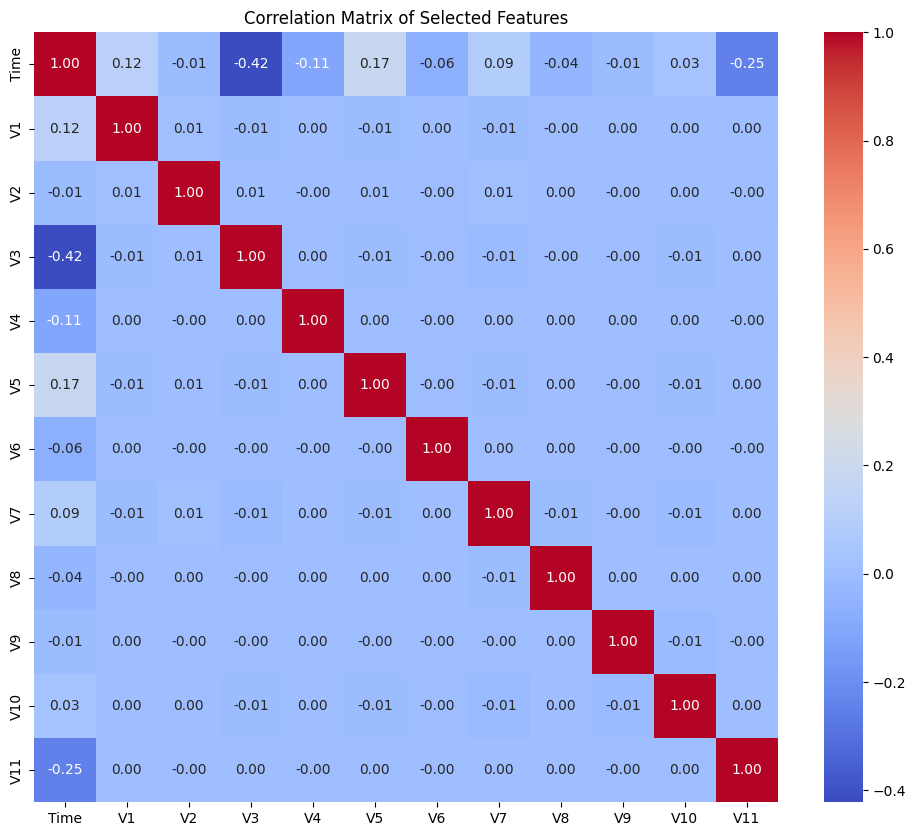

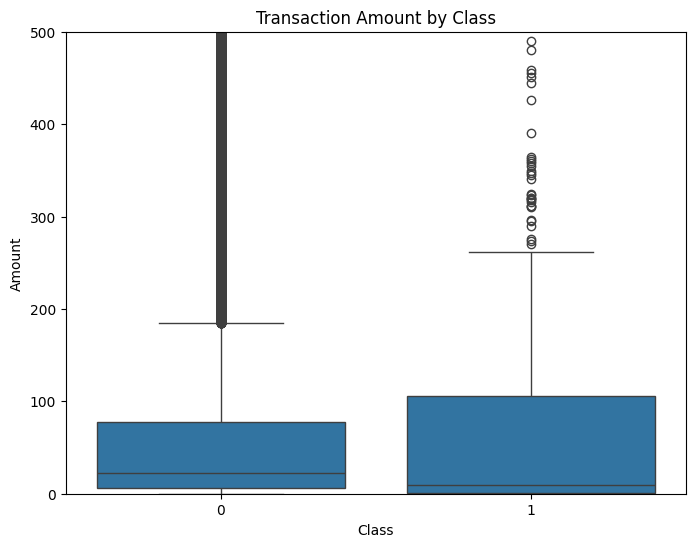

In [10]:
# Correlation Heatmap (Focusing on the first 10 PCA features and Amount)
plt.figure(figsize=(12, 10))
correlation_matrix = credit_card.iloc[:, :12].corr() # V1-V10 + Time + Amount
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Selected Features')
plt.show()

# Boxplot of Amount vs Class
plt.figure(figsize=(8, 6))
sns.boxplot(x='Class', y='Amount', data=credit_card)
plt.title('Transaction Amount by Class')
plt.ylim(0, 500) # Zooming in to see the distribution clearly
plt.show()

#### Class Distribution Analysis

Class Counts:
Class
0    283253
1       473
Name: count, dtype: int64
Class Percentages:
Class
0    99.83329
1     0.16671
Name: proportion, dtype: float64


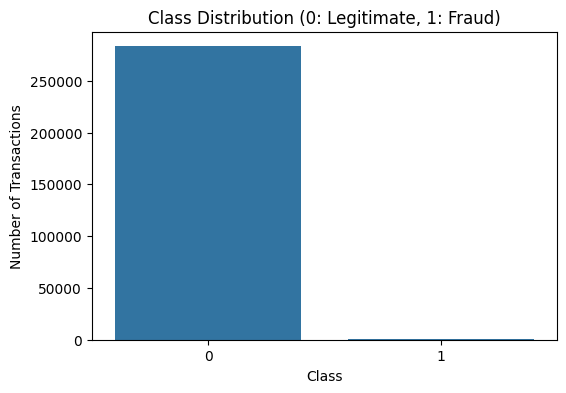

In [11]:
# Count the classes
class_counts = credit_card['Class'].value_counts()
class_percentages = credit_card['Class'].value_counts(normalize=True) * 100

print(f"Class Counts:\n{class_counts}")
print(f"Class Percentages:\n{class_percentages}")

# Visualization
plt.figure(figsize=(6, 4))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Class Distribution (0: Legitimate, 1: Fraud)')
plt.ylabel('Number of Transactions')
plt.show()

In [13]:
output_dir = '../data/processed'
# Save the Fraud Data with integrated Geolocation and Features
credit_card.to_csv(f'{output_dir}/credit_card_cleaned.csv', index=False)